# Annalyse de données DVF

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set_theme()

## **API Mutation**

In [61]:
# Chargement de la donnée
api_mutations = "https://dvfapp.fly.dev/api/count/mutations/97415"
response = requests.get(api_mutations).json()

In [62]:
data = pd.DataFrame(response)
data

,libnatmut,nombre_de_mutation,pourcentage
0,Expropriation,10,0.02
1,Adjudication,33,0.06
2,Echange,38,0.07
3,Vente terrain à bâtir,215,0.37
4,Vente en l'état futur d'achèvement,621,1.06
5,Vente,7466,12.79


In [63]:
# Conversion 
data["nombre_de_mutation"] = data["nombre_de_mutation"].astype('float')
data["pourcentage"] = data["pourcentage"].astype('float')

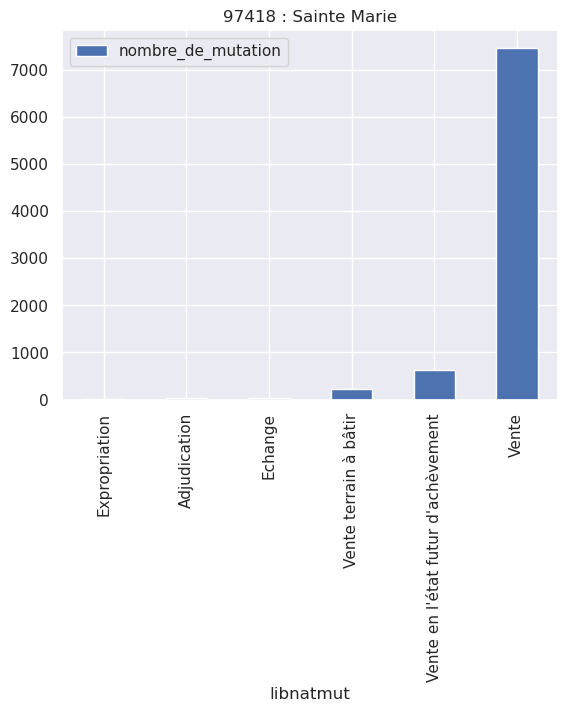

In [64]:
fig, ax = plt.subplots()
ax.set_title("97418 : Sainte Marie")
data[["libnatmut","nombre_de_mutation"]].plot(kind = "bar",ax = ax,x='libnatmut')
plt.show()


## **API Type local**

In [70]:
# Récuperation de la données
api_type_local = "https://dvfapp.fly.dev/api/count/typelocal/97415"
response = requests.get(api_type_local).json()
data_type_local = pd.DataFrame(response)

In [84]:
# Conversion des types
data_type_local
data_type_local.iloc[:,1:7] =  data_type_local.iloc[:,1:7].astype('float')

/tmp/ipykernel_20932/3961800264.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_type_local.iloc[:,1:7] =  data_type_local.iloc[:,1:7].astype('float')


In [88]:
data_type_local

,anneemut,nombre_de_locaux,nombre_de_maisons,nombre_d_appartements,nombre_de_logements,nombre_de_dependance,nombre_de_locaux_activites
0,2014,1114.0,378.0,340.0,718.0,359.0,37.0
1,2015,1200.0,371.0,340.0,711.0,452.0,37.0
2,2016,1482.0,505.0,427.0,932.0,522.0,28.0
3,2017,1654.0,507.0,517.0,1024.0,573.0,57.0
4,2018,1606.0,577.0,502.0,1079.0,474.0,53.0
5,2019,2311.0,464.0,1171.0,1635.0,597.0,79.0
6,2020,2052.0,554.0,753.0,1307.0,639.0,106.0
7,2021,1524.0,371.0,528.0,899.0,570.0,55.0
8,2022,184.0,49.0,48.0,97.0,81.0,6.0


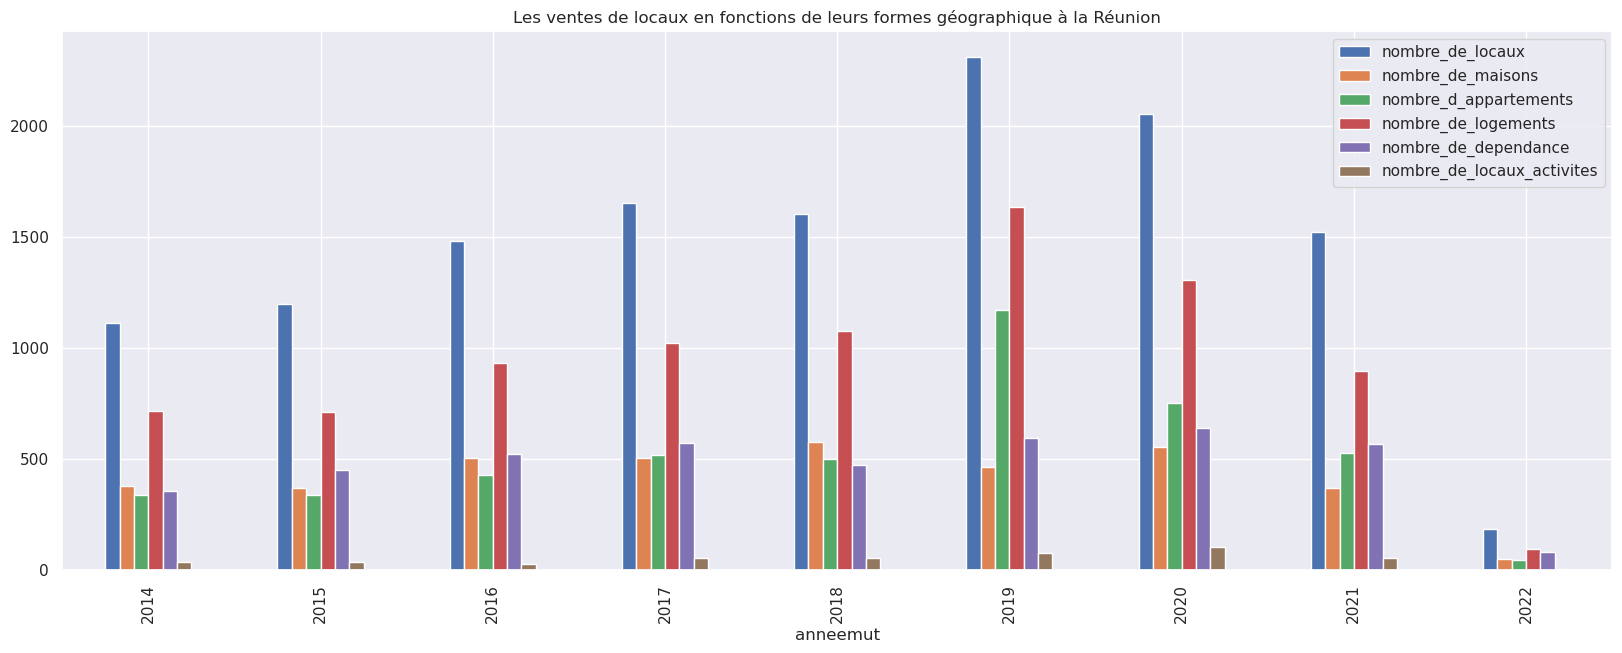

In [98]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("Les ventes de locaux en fonctions de leurs formes géographique à la Réunion")
data_type_local.plot(kind = "bar", x = "anneemut", ax = ax)
plt.show()